# CHƯƠNG 2: QUY TRÌNH XÂY DỰNG MỘT HỆ THỐNG HỌC MÁY - PHẦN 2
---------------------------------
* Mã sinh viên: 1821050491
* Họ và tên: NGuyễn Đức Thắng
* Lớp: Công nghệ phần mềm A
* Email: Thangnguyen1032000@gmail.com
---

# THỰC HÀNH 4
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_practice4 chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

**Yêu cầu 4.1:**
Đọc tập dữ liệu Data_Practice4.csv vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu.


In [6]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#đọc tập dữ liệu và hiển thị thông tin
path_Practice4 ="Data_Practice4.csv"
df_Practice4 = pd.read_csv(path_Practice4)
df_Practice4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [8]:
#Hiển thị danh sách thông tin 5 bệnh nhân đầu tiên
df_Practice4.head(5)

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


In [9]:
#Xây dựng hàm thống kê dữ liệu missing trong dataframe:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [10]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype : number
df_Practice4.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [11]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
df_Practice4.describe(include=['O'])

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,4,5,4
top,P292,Irregular,Circumscribed,Low
freq,1,400,357,798


**Yêu cầu 4.2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [12]:
#thống kê dữ liệu missing cho từng thuộc tính
print('Số lượng missing data trong tập dữ liệu : \n')
missing_values(df_Practice4)

Số lượng missing data trong tập dữ liệu : 

File dữ liệu bao gồm có: 6 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [13]:
#Liệt kê các bản ghi bị missing tương ứng với thuộc tính Age
df_Practice4.loc[df_Practice4[['Age']].isnull().any(axis=1)]

,PatientID,Age,Shape,Margin,Density,Target
443,P444,NaN,Irregular,Spiculated,Low,1
453,P454,NaN,Irregular,ill-defined,Low,1
683,P684,NaN,Lobular,Obscured,Low,1
884,P885,NaN,Irregular,ill-defined,Low,1
923,P924,NaN,Irregular,Obscured,Low,1


In [14]:
#Liệt kê các bản ghi bị missing tương ứng với thuộc tính Shape
df_Practice4.loc[df_Practice4[['Shape']].isnull().any(axis=1)]

,PatientID,Age,Shape,Margin,Density,Target
6,P7,70.0,NaN,NaN,Low,0
9,P10,60.0,NaN,Spiculated,High,1
20,P21,66.0,NaN,NaN,High,1
48,P49,42.0,NaN,NaN,Fat-containing,0
54,P55,53.0,NaN,Spiculated,Low,1
74,P75,70.0,NaN,ill-defined,NaN,1
83,P84,57.0,NaN,ill-defined,High,0
128,P129,52.0,NaN,ill-defined,NaN,0
157,P158,51.0,NaN,NaN,Low,0
163,P164,53.0,NaN,ill-defined,Low,0


In [15]:
#Liệt kê các bản ghi bị missing tương ứng với thuộc tính Density
df_Practice4.loc[df_Practice4[['Density']].isnull().any(axis=1)]

,PatientID,Age,Shape,Margin,Density,Target
1,P2,43.0,Round,Circumscribed,NaN,1
4,P5,74.0,Round,Spiculated,NaN,1
19,P20,40.0,Round,NaN,NaN,0
22,P23,43.0,Round,NaN,NaN,0
26,P27,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...,...
614,P615,46.0,NaN,Spiculated,NaN,1
627,P628,57.0,Oval,Circumscribed,NaN,0
665,P666,27.0,Oval,Circumscribed,NaN,0
677,P678,57.0,Irregular,ill-defined,NaN,1


In [16]:
#Liệt kê các bản ghi bị missing tương ứng với thuộc tính Margin
df_Practice4.loc[df_Practice4[['Margin']].isnull().any(axis=1)]

,PatientID,Age,Shape,Margin,Density,Target
5,P6,65.0,Round,NaN,Low,0
6,P7,70.0,NaN,NaN,Low,0
7,P8,42.0,Round,NaN,Low,0
12,P13,64.0,Round,NaN,Low,0
19,P20,40.0,Round,NaN,NaN,0
20,P21,66.0,NaN,NaN,High,1
22,P23,43.0,Round,NaN,NaN,0
27,P28,63.0,Lobular,NaN,Low,0
35,P36,77.0,Lobular,NaN,NaN,0
48,P49,42.0,NaN,NaN,Fat-containing,0


**Yêu cầu 4.3:** Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 

In [17]:
#Đặc tính Shape
df_Practice4[['Shape', 'Target']].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


In [18]:
#Đặc tính Margin
df_Practice4[['Margin', 'Target']].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


In [19]:
#Đặc tính Density
df_Practice4[['Density', 'Target']].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


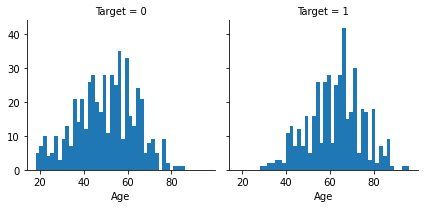

In [20]:
#Đặc tính Age
g = sns.FacetGrid(df_Practice4, col='Target')
g.map(plt.hist, 'Age', bins=40)

**Yêu cầu 4.4:** Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice4_ok.csv 


**Loại bỏ các thuộc tính không quan trọng
Một số thuộc tính không|ít ảnh hưởng tới việc hành khách được cứu hay không, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện.**

**Có 1 thuộc tính không ảnh hưởng|ít ảnh hưởng bao gồm:**

* PatienID: Thuộc tính cho biết mã số của bệnh nhân, đánh số thứ tự của bệnh nhân (Bỏ)


In [21]:
#Tạo một DataFrame mới df_data loại bỏ đi  thuộc tính ko quan trọng
df_data = df_Practice4.drop(['PatientID'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


In [22]:
#xử lý missing data trong dataframe mới
missing_values(df_data)

File dữ liệu bao gồm có: 5 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [23]:
#Dánh sách hành khách missing thộc tính Shape trong tập dữ liệu
df_data[df_data['Shape'].isnull()]

,Age,Shape,Margin,Density,Target
6,70.0,NaN,NaN,Low,0
9,60.0,NaN,Spiculated,High,1
20,66.0,NaN,NaN,High,1
48,42.0,NaN,NaN,Fat-containing,0
54,53.0,NaN,Spiculated,Low,1
74,70.0,NaN,ill-defined,NaN,1
83,57.0,NaN,ill-defined,High,0
128,52.0,NaN,ill-defined,NaN,0
157,51.0,NaN,NaN,Low,0
163,53.0,NaN,ill-defined,Low,0


In [24]:
#Thống kê Các dạng Shape của các bệnh nhân :
df_data['Shape'].value_counts()

Irregular    400
Round        224
Oval         211
Lobular       95
Name: Shape, dtype: int64

**Trong 4 giá trị trên của thuộc tính Shape thì giá trị Irregular có số lần xuất hiện nhiều hơn 
==> Nên t xử lý các dữ liệu missing ở thuộc tính Shape bằng giá trị có lần xuất hiện nhiều hơn là Irregular**

In [25]:
df_data['Shape'] = df_data['Shape'].fillna('Irregular')

In [26]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Shape
df_data.isnull().sum()

Age         5
Shape       0
Margin     48
Density    76
Target      0
dtype: int64

**Làm tương tự với 2 thuộc tính Margin và Density**

In [27]:
df_data['Margin'].value_counts()

Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [28]:
df_data['Margin'] = df_data['Margin'].fillna('Circumscribed')

In [29]:
df_data['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

In [30]:
df_data['Density'] = df_data['Density'].fillna('Low')

In [31]:
#Dánh sách hành khách missing thộc tính Age trong tập dữ liệu
df_data[df_data['Age'].isnull()]

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1
453,NaN,Irregular,ill-defined,Low,1
683,NaN,Lobular,Obscured,Low,1
884,NaN,Irregular,ill-defined,Low,1
923,NaN,Irregular,Obscured,Low,1


**theo ta thấy thì dữ liệu missing của thuộc tính age đều có chung 1 giá trị low ở thuộc tính Density.
Vậy nên ta sẽ xét sự tương quan giữa 3 thuộc tính còn lại là thuộc tính Age, Shape và Margin.

C:\Users\tss\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


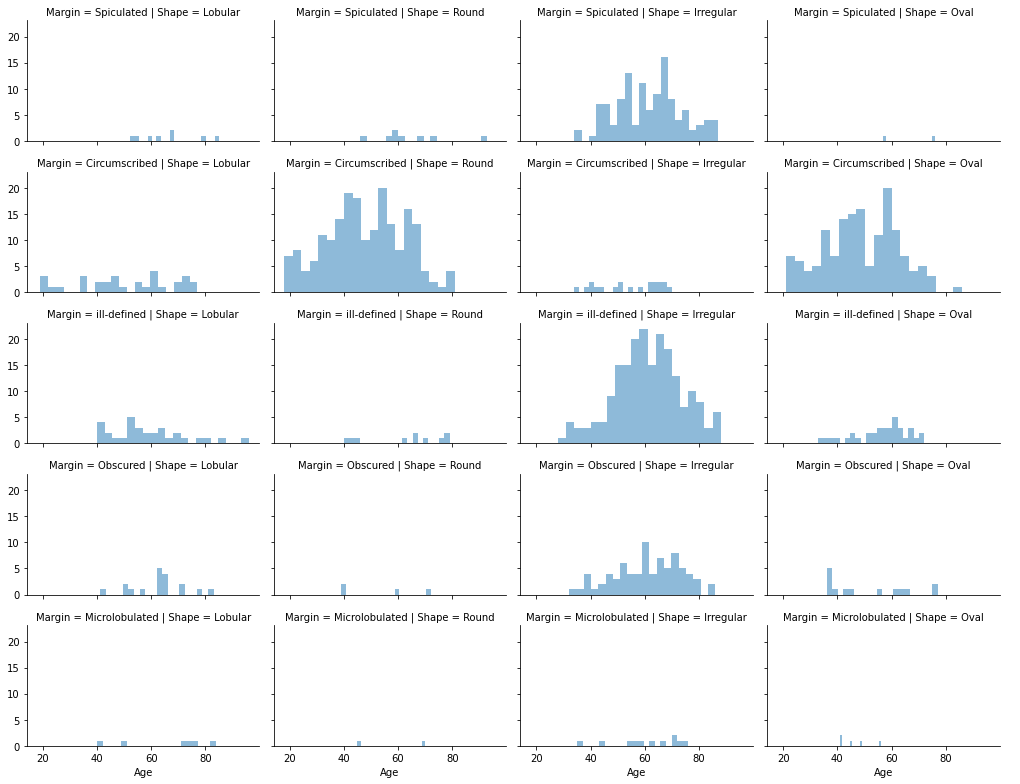

In [32]:
grid = sns.FacetGrid(df_data, row='Margin', col='Shape', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Bởi vậy chúng ta sẽ ước chừng giá trị Age tại các vị trí thiếu sử dụng các giá trị trung bình của thuộc tính Age
theo các tập của sự kết hợp giữa thuộc tính Margin và Shape. 
như, trung bình Age của Shape = Irregular và Margin = Spiculated, Shape = ... và Margin = ...vv.**

**Nhưng cách này có quá nhiều trường hợp và một số trường hợp quá ít xảy ra hoặc gần như là không có.
Cộng thêm việc số dữ liệu missing quá ít trong trường hợp này là 5.**
* Nên ta sẽ gán giá trị missing cho thuộc tính Age luôn.
==> Trường hợp này là gán giá trị xuất hiện nhiều nhất.

In [33]:
#Thống kê giá trị khác nhau của thuộc tính Age
#Để xác định thuộc tính xuất hiện nhiều nhất trong tập dữ liệu

df_data['Age'].value_counts()

59.0    36
67.0    32
57.0    32
66.0    31
46.0    28
        ..
18.0     1
96.0     1
82.0     1
93.0     1
20.0     1
Name: Age, Length: 73, dtype: int64

In [34]:
##Trong 4 giá trị trên của thuộc tính Age thì giá trị 59.0 có số lần xuất hiện nhiều hơn 
##Nên t xử lý các dữ liệu missing ở thuộc tính Age bằng giá trị có lần xuất hiện nhiều hơn là 59.0 

df_data['Age'] = df_data['Age'].fillna('59.0')

In [35]:
#Kiểm tra lại toàn bộ dữ liệu sau khi xử lý xong toàn bộ dữ liệu missing
missing_values(df_data)

File dữ liệu bao gồm có: 5 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


**Rời rạc hóa dữ liệu

In [36]:
#Tính tỷ lệ được bị u lành hay ác tính của bệnh nhân theo từng khoảng tuổi:
n=6
df_news = df_data.copy()
df_news['Age'] = df_news['Age'].astype(float)
df_news['AgeBand'] = pd.cut(df_news['Age'], n)

df_news[['AgeBand', 'Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Target
0,"(17.922, 31.0]",0.036364
1,"(31.0, 44.0]",0.255952
2,"(44.0, 57.0]",0.360424
3,"(57.0, 70.0]",0.585209
4,"(70.0, 83.0]",0.790323
5,"(83.0, 96.0]",0.900000


**Ta thấy rằng, tỷ lệ được u lành tính  có quan hệ theo độ tuổi, người già và trẻ em có tỷ lệ được cứu cao. Thực hiện chia dữ liệu độ tuổi theo từng đoạn**

* Từ 18 --> 31 tuổi: có tỷ lệ u ác tính thấp nhất (0.3%)
* Từ 31 --> 44 tuổi: có tỷ lệ u ác tính cao thứ 5 (25.5%)
* Từ 44 --> 57 tuổi: có tỷ lệ u ác tính cao thứ 4 (36 %)
* Từ 57 --> 70 tuổi: có tỷ lệ u ác tính cao thứ 3 (58.5%)
* Từ 70 --> 83 tuổi: có tỷ lệ u ác tính cao thứ 2 (79%)
* Trên 83 tuổi : có tỷ lệ u ác tính cao nhất (90%)

In [37]:
df_news

,Age,Shape,Margin,Density,Target,AgeBand
0,67.0,Lobular,Spiculated,Low,1,"(57.0, 70.0]"
1,43.0,Round,Circumscribed,Low,1,"(31.0, 44.0]"
2,58.0,Irregular,Spiculated,Low,1,"(57.0, 70.0]"
3,28.0,Round,Circumscribed,Low,0,"(17.922, 31.0]"
4,74.0,Round,Spiculated,Low,1,"(70.0, 83.0]"
...,...,...,...,...,...,...
956,47.0,Oval,Circumscribed,Low,0,"(44.0, 57.0]"
957,56.0,Irregular,Spiculated,Low,1,"(44.0, 57.0]"
958,64.0,Irregular,Spiculated,Low,0,"(57.0, 70.0]"
959,66.0,Irregular,Spiculated,Low,1,"(57.0, 70.0]"


**Thay thế tuổi tuyệt đối của bệnh nhân bằng khoảng mà tuổi thuộc vào:**
* Từ 18 --> 31 tuổi:   --> Age = 0
* Từ 31 --> 44 tuổi:   --> Age = 1
* Từ 44 --> 57 tuổi:   --> Age = 2
* Từ 57 --> 70 tuổi:   --> Age = 3
* Từ 70 --> 83 tuổi    --> Age = 4
* Trên 83 tuổi        :   --> Age = 5

In [38]:
df_data.loc[(df_news['Age'] > 18) & (df_news['Age'] <= 31), 'Age'] = 0
df_data.loc[(df_news['Age'] > 31) & (df_news['Age'] <= 44), 'Age'] = 1
df_data.loc[(df_news['Age'] > 44) & (df_news['Age'] <= 57), 'Age'] = 2
df_data.loc[(df_news['Age'] > 57) & (df_news['Age'] <= 70), 'Age'] = 3
df_data.loc[(df_news['Age'] > 70) & (df_news['Age'] <= 83), 'Age'] = 4
df_data.loc[ df_news['Age'] > 83, 'Age'] = 5

In [39]:
df_data

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,3,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,4,Round,Spiculated,Low,1
...,...,...,...,...,...
956,2,Oval,Circumscribed,Low,0
957,2,Irregular,Spiculated,Low,1
958,3,Irregular,Spiculated,Low,0
959,3,Irregular,Spiculated,Low,1


In [40]:
#Ép Age sang kiểu dữ liệu số nguyên
df_data['Age'] = df_data['Age'].astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,3,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,4,Round,Spiculated,Low,1


**Chuyển đổi tất cả dữ liệu sang dạng số**

Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu Catagorical về dạng số để cho vào mô hình học máy.

Các thuộc tính cần chuyển đổi bao gồm:
* Shape 
* Margin
* Density

In [41]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
# trong đó: Round = 0, Oval = 1, Lobular = 2, Irregular = 3

df_data['Shape'] = df_data['Shape'].map( {'Round': 0, 'Oval': 1, 'Lobular': 2, 'Irregular': 3} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,Spiculated,Low,1
1,1,0,Circumscribed,Low,1
2,3,3,Spiculated,Low,1
3,0,0,Circumscribed,Low,0
4,4,0,Spiculated,Low,1


**Làm tương tự với 2 thuộc tính còn lại**

In [42]:
df_data['Margin'] = df_data['Margin'].map( {'Circumscribed': 0, 'Microlobulated': 1,
                                            'Obscured': 2, 'ill-defined': 3,
                                           'Spiculated':4} ).astype(int)

In [43]:
df_data['Density'] = df_data['Density'].map( {'High': 0, 'Iso': 1, 'Low': 2,
                                              'Fat-containing': 3} ).astype(int)

In [44]:
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,2,4,2,1
1,1,0,0,2,1
2,3,3,4,2,1
3,0,0,0,2,0
4,4,0,4,2,1


In [45]:
#Lưu dữ liệu đã hoàn thiện 
df_data.to_csv('Data/Data_Practice4_ok.csv',index=None)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Data_Practice4_ok.csv'

# Bài thực hành số 5:
 
Tập dữ liệu mushrooms.csv chứa dữ liệu của 8124 cây nấm , bao gôm 2 loại ăn được (e) và nấm độc (p)

Lưu ý : các kí tự ? là các dữ liệu thiếu 

**Yêu cầu :**
1. Nghiên cứu để hiểu tập dữ liệu Mushrooms.csv 
2. Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy
3. lưu kết quả dữ liệu sau xử lý ra file Mushrooms_ok.csv

In [ ]:
#Gọi các thư viện sử dụng cho Project:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#đọc tập dữ liệu và hiển thị thông tin
path_mushrooms ="Data/mushrooms.csv"
df_mushrooms = pd.read_csv(path_mushrooms)
df_mushrooms.info()

In [ ]:
#Hiển thị danh sách thông tin 5 loại nấm đầu tiên
df_mushrooms.head(5)

In [ ]:
#Xây dựng hàm thống kê dữ liệu missing trong dataframe:
def missing_values2(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [ ]:
#thống kê dữ liệu missing cho từng thuộc tính
print('Số lượng missing data trong tập dữ liệu : \n')
missing_values2(df_mushrooms)

In [ ]:
df_mushrooms.isnull().any()

**Như ta đã thấy tập dữ liệu không có giá trị missing. Nên sẽ trực tiếp áp dụng kĩ thuật chuẩn hóa**

In [ ]:
#Trực quan hóa dữ liệu
sns.barplot(x="class", y=df_mushrooms["class"].index, palette='mako',data=df_mushrooms)

**Qua bước trực quan hóa ở trên ta thấy được rằng số nấm độc gần như là gấp đôi số nấm thường**

==> Có sự mất cân bằng dữ liệu ở tập dữ liệu này

**Vì toàn bộ dữ liệu trong tập đều ở dạng Object nên là cần đưa tất cả về dạng số để máy có thể học được**

Nhưng do có quá nhiều thuộc tính và trong mỗi thuộc tính có nhiều giá trị vậy nên số hóa theo cách thông thường trở nên 
mất rất nhiều thời gian nên e dùng lớp  LabelEncoder từ thư viện sklearn để chuẩn hóa dữ liệu nhanh hơn

In [ ]:
#Liệt kê các giá trị tất cả các thuộc tính trong bộ dữ liệu 
print('1. Thuộc tính class:', df_mushrooms['class'].unique())
print('2. Thuộc tính cap-shape:', df_mushrooms['cap-shape'].unique())
print('3. Thuộc tính cap-surface:', df_mushrooms['cap-surface'].unique())


In [ ]:
#Chuyển đổi dữ liệu sang dạng số
def label_encode_fit(df_mushrooms, columns):
    result = df_mushrooms.copy()
    encoders = {}
    for column in columns:
        encoder = preprocessing.LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders

In [ ]:
data1, encoders1 = label_encode_fit(df_mushrooms,df_mushrooms.columns)

data1.info()

In [ ]:
data1.head(10)

In [ ]:
#Lưu dữ liệu đã hoàn thiện 
data1.to_csv('Data/Data_Mushrooms_ok.csv',index=None)